In [6]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 25 * 2 * np.pi  # MHz
kappa = 8 * 2 * np.pi  # MHz
gamma_s = 5.2 * 2 * np.pi  # MHz

# Time units (use MHz → μs units)
g = g * 1e-6
kappa = kappa * 1e-6
gamma_s = gamma_s * 1e-6

n_max = 2  # Cavity cutoff

# Operators
a = tensor(qeye(2), destroy(n_max))            # cavity annihilation
sm = tensor(sigmam(), qeye(n_max))             # atomic lowering operator
H = g * (a.dag() * sm + a * sm.dag())          # Jaynes-Cummings

In [2]:
# Gaussian pulse shape
def gauss_pulse(t, args):
    T = args['T']
    return np.exp(-4 * np.log(2) * (t - T/2)**2 / (T**2))

# Drive term
H_drive = [a + a.dag(), gauss_pulse]

In [3]:
c_ops = []

# Cavity decay
c_ops.append(np.sqrt(kappa) * a)

# Spontaneous emission
c_ops.append(np.sqrt(gamma_s) * sm)

In [4]:
T = 1.0  # μs pulse duration
times = np.linspace(0, T, 1000)

# Initial state: atom in |0>, cavity vacuum
psi0 = tensor(basis(2, 0), basis(n_max, 0))

result = mesolve([H, H_drive], psi0, times, c_ops, [], args={'T': T})


/home/lz/Documents/uni/master/master_thesis/code/.venv/lib/python3.13/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


In [5]:
a_expect = expect(a, result.states)
phase_shift = np.angle(a_expect)

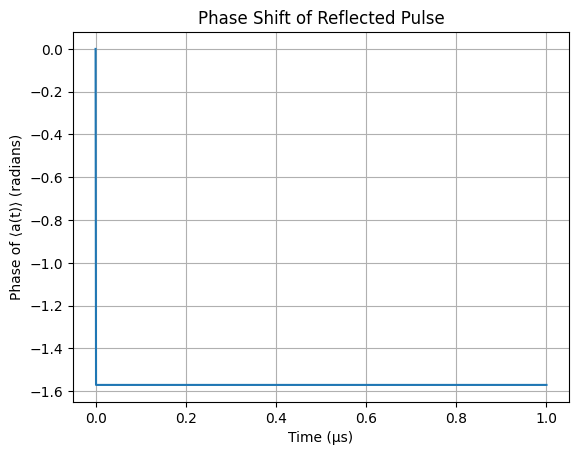

In [7]:
plt.plot(times, phase_shift)
plt.xlabel("Time (μs)")
plt.ylabel("Phase of ⟨a(t)⟩ (radians)")
plt.title("Phase Shift of Reflected Pulse")
plt.grid(True)
plt.show()

In [11]:
# Atom in |1⟩
psi1 = tensor(basis(2, 1), basis(n_max, 0))
result1 = mesolve([H, H_drive], psi1, times, c_ops, [], args={'T': T})
a_expect_1 = expect(a, result1.states)
phase_1 = np.angle(a_expect_1)

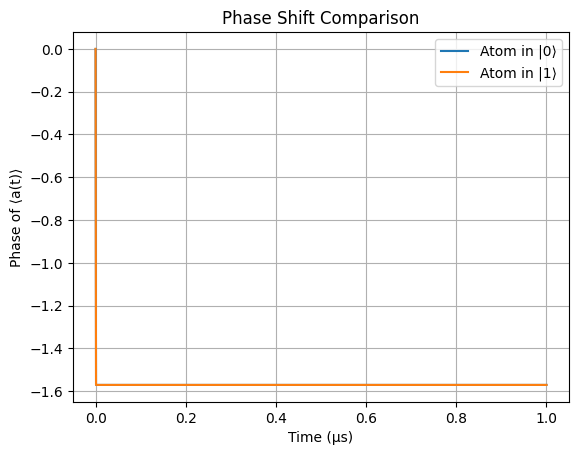

In [13]:
plt.plot(times, np.angle(a_expect), label="Atom in |0⟩")
plt.plot(times, np.angle(a_expect_1), label="Atom in |1⟩")
plt.xlabel("Time (μs)")
plt.ylabel("Phase of ⟨a(t)⟩")
plt.title("Phase Shift Comparison")
plt.legend()
plt.grid(True)
plt.show()